<a href="https://colab.research.google.com/github/fralfaro/MAT281_2023/blob/main/docs/labs/lab_071.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°071


<a id='p1'></a>
## I.- Problema 01


<img src="https://drive.google.com/uc?export=view&id=1cI62fPIKkkofrAHLQaWLfcIr3qlE1TAZ" width = "350" align="center"/>



Los datos se refieren a las casas encontradas en un distrito determinado de California y algunas estadísticas resumidas sobre ellas basadas en los datos del censo de 1990. Tenga en cuenta que los datos no se limpian, por lo que se requieren algunos pasos de procesamiento previo.

Las columnas son las siguientes, sus nombres se explican por sí mismos:

* longitude
* latitude
* housingmedianage
* total_rooms
* total_bedrooms
* population
* households
* median_income
* medianhousevalue
* ocean_proximity


El objetivo es poder predecir el valor promedio de cada propiedad.
Para poder completar correctamente este laboratorio, es necesario seguir la siguiente rúbrica de trabajo:

1. Definición del problema
2. Estadística descriptiva
3. Visualización descriptiva
4. Preprocesamiento
5. Selección de modelo (Por lo menos debe comparar cuatro modelos)
6. Métricas y análisis de resultados
7. Visualizaciones del modelo
8. Conclusiones

> **Observación**: El alumno tiene la libertad de desarrollar un análisis más completo del problema. Puede tomar como referencia el siguiente [link](https://www.kaggle.com/camnugent/california-housing-prices).

In [ ]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(8,4)})
plt.rcParams.update({'font.size': 8})
plt.rc('xtick',labelsize=8)
plt.rc('ytick',labelsize=8)
plt.rc('axes', labelsize=8)
plt.rc('legend',fontsize=10)

In [ ]:
#mas imports y funciones
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def regression_metrics(df):
    """
    Aplicar las distintas métricas definidas
    :param df: DataFrame con las columnas: ['y', 'yhat']
    :return: DataFrame con las métricas especificadas
    """
    df_result = pd.DataFrame()

    y_true = df['y']
    y_pred = df['yhat']

    df_result['mae'] = [round(mean_absolute_error(y_true, y_pred), 4)]
    df_result['mse'] = [round(mean_squared_error(y_true, y_pred), 4)]
    df_result['rmse'] = [round(np.sqrt(mean_squared_error(y_true, y_pred)), 4)]
    df_result['mape'] = [round(mean_absolute_percentage_error(y_true, y_pred), 4)]
    df_result['smape'] = [round(2 * mean_absolute_percentage_error(y_true, y_pred) / (mean_absolute_percentage_error(y_true, y_pred) + 100), 4)]

    return df_result

In [ ]:
from sklearn.datasets import fetch_california_housing

# Cargar los datos de housing
housing_data = fetch_california_housing(as_frame=True)

# Convertir los datos en un DataFrame de pandas
housing = housing_data['data']
housing['target'] = housing_data['target']

# Visualizar las primeras filas del DataFrame
housing

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


Problema: Queremos predecir los precios (valor promedio) de propiedades, para esto usaremos modelos de "regresion"

## Estadistica y Visualización descriptiva

Vemos que no hay NANs

In [ ]:
housing.isna().sum().sum()

0

Un poco de estadistica

In [ ]:
housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Notar que hay atributos con mucha desviacion estandar como Population con 1425

Vemos que todos los tipos de datos son float64

In [ ]:
housing.dtypes

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
target        float64
dtype: object

Como son todos "continuos" (flotantes) visualizemos los datos como si fueran una distribución

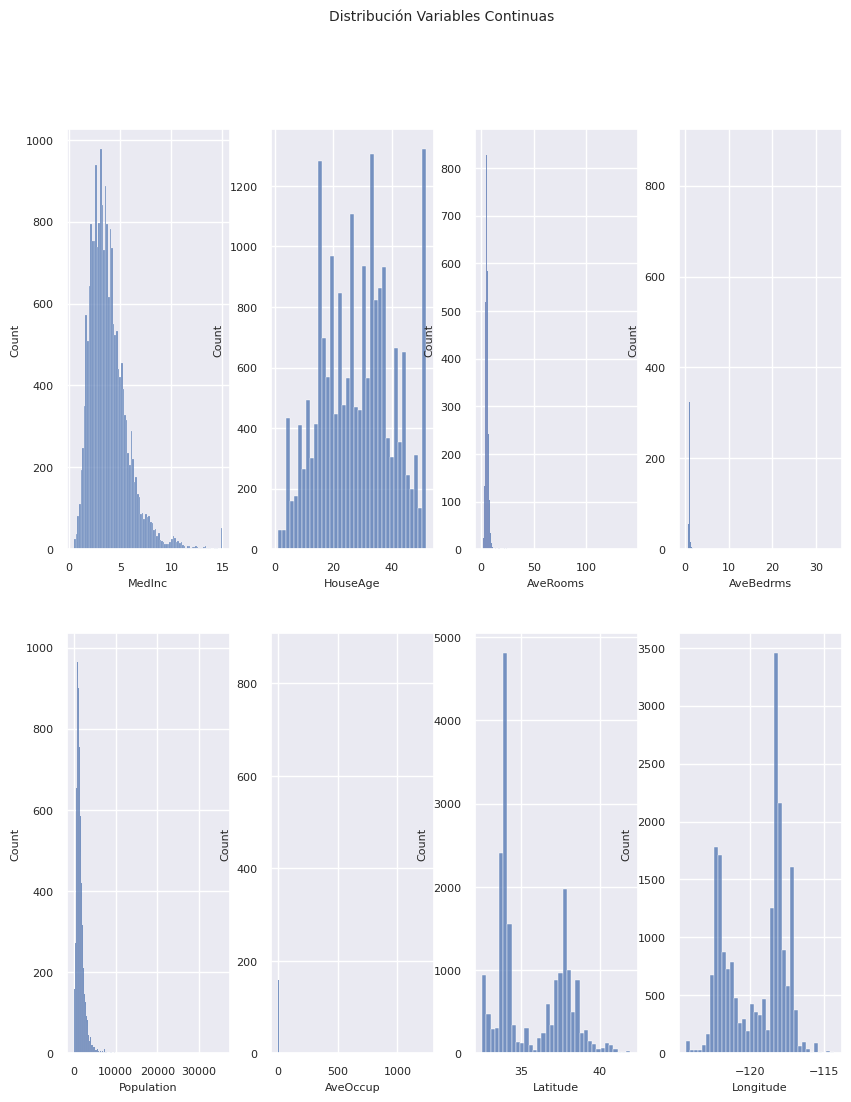

In [ ]:
columnas = ['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude']

fig, axes = plt.subplots(figsize=(10,12), nrows=2, ncols=4)
fig.suptitle('Distribución Variables Continuas', fontsize=10)
fig.subplots_adjust(wspace=0.25)
for i,column in enumerate(columnas):
    if i==7:
        sns.histplot(data=housing,x=column,ax=axes[i//4, i%4])
    else:
        sns.histplot(data=housing,x=column,ax=axes[i//4, i%4])#,log_scale=True
plt.show()

Los graficos de AveRooms, AveBedrms, Population y AveOccup se ven concentrados a un lado, esto se podria deber a posibles "outlayers".

Hagamos un boxplot para ello:

<Axes: >

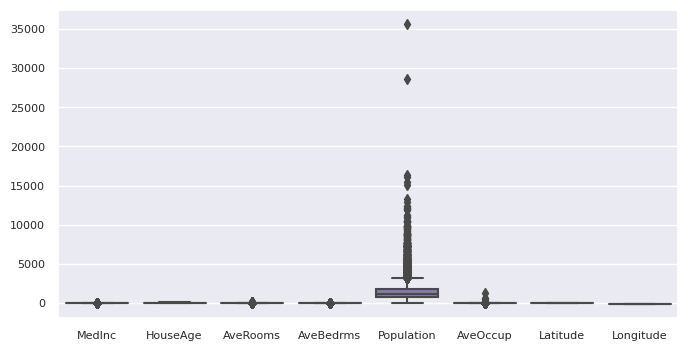

In [ ]:
atributos = housing.columns.drop('target')
x=housing[atributos.to_list()]
sns.boxplot(data=housing[atributos])

##Preprocesamiento

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(housing.drop('target',axis=1),housing['target'],random_state=42,test_size=0.1)
num_selector = make_column_selector(dtype_include='number')
scaler = StandardScaler()
num_tuple = (scaler, num_selector)
col_transformer = make_column_transformer(num_tuple, remainder = 'passthrough')

col_transformer.fit(X_train)

X_train_processed = col_transformer.transform(X_train)
X_test_processed = col_transformer.transform(X_test)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)
X_train_processed_cuadratic=poly.fit_transform(X_train_processed)
X_test_processed_cuadratic=poly.transform(X_test_processed)

poly3=PolynomialFeatures(degree=3)
X_train_processed_cubic=poly3.fit_transform(X_train_processed)
X_test_processed_cubic=poly3.transform(X_test_processed)

## Selección de Modelo y Training

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
modelo_lr = LinearRegression()
modelo_ridge_cuadratico = linear_model.Ridge(alpha=100)
modelo_ridge_cubic= linear_model.Ridge(alpha=125)
modelo_lasso= linear_model.Lasso(alpha=0.1)
modelo_ridge = linear_model.Ridge(alpha=1)
#training
modelo_lr.fit(X_train_processed,y_train)
modelo_lasso.fit(X_train_processed,y_train)
modelo_ridge.fit(X_train_processed,y_train)
modelo_ridge_cuadratico.fit(X_train_processed_cuadratic,y_train)
modelo_ridge_cubic.fit(X_train_processed_cubic,y_train)

#Por ahora, usaremos el test set para ver si hay overfitting (como si fuera conjunto de validación)
print('regresion lineal:')
print('train score:',modelo_lr.score(X_train_processed,y_train))
print('test score:',modelo_lr.score(X_test_processed,y_test))
print('lasso:')
print('train score:',modelo_lasso.score(X_train_processed,y_train))
print('test score:',modelo_lasso.score(X_test_processed,y_test))
print('ridge:')
print('train score:',modelo_ridge.score(X_train_processed,y_train))
print('test score:',modelo_ridge.score(X_test_processed,y_test))
print('ridge con atributos cuadraticos:')
print('train score:',modelo_ridge_cuadratico.score(X_train_processed_cuadratic,y_train))
print('test score:',modelo_ridge_cuadratico.score(X_test_processed_cuadratic,y_test))
print('ridge con atributos cubicos:')
print('train score:',modelo_ridge_cubic.score(X_train_processed_cubic,y_train))
print('test score:',modelo_ridge_cubic.score(X_test_processed_cubic,y_test))

regresion lineal:
train score: 0.6090110220005639
test score: 0.5808353312067694
lasso:
train score: 0.49662898175509906
test score: 0.47759427649920116
ridge:
train score: 0.6090109682193919
test score: 0.580836591611432
ridge con atributos cuadraticos:
train score: 0.677415452992177
test score: 0.6503424935821389
ridge con atributos cubicos:
train score: 0.7082299092714308
test score: 0.6866663750289392


## Metricas y Análisis de Resultados

In [ ]:
y_lr=modelo_lr.predict(X_train_processed)
y_lasso=modelo_lasso.predict(X_train_processed)
y_ridge=modelo_ridge.predict(X_train_processed)
y_ridge_cuadratico=modelo_ridge_cuadratico.predict(X_train_processed_cuadratic)
y_ridge_cubic=modelo_ridge_cubic.predict(X_train_processed_cubic)
d_lr = {'y':y_train ,'yhat':y_lr}
d_lasso = {'y':y_train ,'yhat':y_lasso}
d_ridge = {'y':y_train ,'yhat':y_ridge}
d_ridge_cuadratico = {'y':y_train ,'yhat':y_ridge_cuadratico}
d_ridge_cubic = {'y':y_train, 'yhat':y_ridge_cubic}
df_lr=pd.DataFrame(data=d_lr)
df_lasso=pd.DataFrame(data=d_lasso)
df_ridge=pd.DataFrame(data=d_ridge)
df_ridge_cuadratico=pd.DataFrame(data=d_ridge_cuadratico)
df_ridge_cubic=pd.DataFrame(data=d_ridge_cubic)

In [ ]:
print('metricas regresion lineal:')
display(regression_metrics(df_lr))
print('metricas lasso:')
display(regression_metrics(df_lasso))
print('metricas ridge:')
display(regression_metrics(df_ridge))
print('metricas ridge con atributos cuadraticos')
display(regression_metrics(df_ridge_cuadratico))
print('metricas ridge con atributos cubicos')
display(regression_metrics(df_ridge_cubic))

metricas regresion lineal:


,mae,mse,rmse,mape,smape
0,0.5295,0.5205,0.7215,31.6319,0.4806


metricas lasso:


,mae,mse,rmse,mape,smape
0,0.618,0.6701,0.8186,39.3857,0.5651


metricas ridge:


,mae,mse,rmse,mape,smape
0,0.5295,0.5205,0.7215,31.6313,0.4806


metricas ridge con atributos cuadraticos


,mae,mse,rmse,mape,smape
0,0.4709,0.4295,0.6553,27.0033,0.4252


metricas ridge con atributos cubicos


,mae,mse,rmse,mape,smape
0,0.4452,0.3884,0.6232,26.2158,0.4154


Considerando las metricas y los scores (vistos en el entrenamiento), podemos decir que ridge con $\alpha=125$ fue el mejor, pues tuvo errores más bajos y el mejor score.

## Conclusión

ridge con atributos cubicos y $\alpha =125$ fue el mejor modelo de los 5 propuestos.

Si tuviera más tiempo probaria otros modelos (como bayesianos, svm, svm no lineal) e intentaria quitar los outlayers (para ver si ayuda a la generalizacion).